# BANCA TRINACRIA - Exploratory Data Analysis
## Analisi Esplorativa Dati Bancari

**Autore**: Vincenzo Alesi | Data Analyst  
**Data**: Gennaio 2026  
**Obiettivo**: Analisi esplorativa completa del dataset bancario

---

## 1. Setup e Import Librerie

# Setup dell'ambiente di analisi

In questa sezione vengono importate le principali librerie utilizzate per:
- **manipolazione dei dati**
- **visualizzazione**
- **analisi statistica**
- **preprocessing**
- **configurazione dell’ambiente di lavoro**

L’obiettivo è avere un ambiente coerente, leggibile e pronto per l’analisi esplorativa e modellistica.

## Manipolazione dei dati

Utilizziamo:
- **pandas** per la gestione di DataFrame e dataset tabellari  
- **numpy** per operazioni numeriche e matriciali efficienti

## Visualizzazione

Librerie utilizzate:
- **matplotlib** per grafici statici personalizzabili
- **seaborn** per visualizzazioni statistiche ad alto livello
- **plotly** per grafici interattivi

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Statistica e preprocessing

Queste librerie servono per:
- test statistici (t-test, chi-quadro)
- analisi delle distribuzioni
- normalizzazione dei dati

In [2]:
# Statistics
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import MinMaxScaler

## Gestione dei warning

I warning vengono disabilitati per mantenere l’output pulito e leggibile,
soprattutto durante l’analisi esplorativa.

In [3]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

## Impostazioni di visualizzazione

Queste opzioni migliorano la leggibilità dei DataFrame:
- tutte le colonne visibili
- fino a 100 righe mostrate
- formattazione dei numeri decimali

In [4]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

## Stile dei grafici

Viene impostato uno stile coerente e moderno per tutte le visualizzazioni,
utilizzando:
- uno stile scuro per matplotlib
- una palette cromatica uniforme per seaborn

In [5]:
# Plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Caricamento dei dati

In questa sezione definiamo il percorso in cui sono salvati i file CSV
e procediamo al caricamento dei dataset principali del progetto.

I file rappresentano le principali entità del dominio bancario:
- clienti
- filiali
- dipendenti
- conti
- transazioni
- prestiti

In [6]:
DATA_PATH = r"C:\Users\Vincenzo\Desktop\Banca\Python\data\csv_output\\"

print("Caricamento dati...")

Caricamento dati...


## Lettura dei file CSV

Ogni dataset viene caricato con `pandas.read_csv`, specificando:
- il percorso del file
- le colonne di tipo data, convertite automaticamente in formato `datetime`

Questo permette di:
- lavorare facilmente con date e periodi temporali
- evitare conversioni manuali successive

In [7]:
# Clienti
df_clienti = pd.read_csv(
    f"{DATA_PATH}clienti.csv",
    parse_dates=['data_nascita', 'data_acquisizione']
)

# Filiali
df_filiali = pd.read_csv(
    f"{DATA_PATH}filiali.csv",
    parse_dates=['data_apertura']
)

# Dipendenti
df_dipendenti = pd.read_csv(
    f"{DATA_PATH}dipendenti.csv",
    parse_dates=['data_assunzione', 'data_cessazione']
)

# Conti
df_conti = pd.read_csv(
    f"{DATA_PATH}conti.csv",
    parse_dates=['data_apertura', 'data_chiusura']
)

# Transazioni
df_transazioni = pd.read_csv(
    f"{DATA_PATH}transazioni.csv",
    parse_dates=['data_transazione']
)

# Prestiti
df_prestiti = pd.read_csv(
    f"{DATA_PATH}prestiti.csv",
    parse_dates=['data_erogazione', 'data_scadenza']
)

## Verifica rapida dei dataset

Controlliamo dimensioni e struttura dei DataFrame per assicurarci
che il caricamento sia avvenuto correttamente.

In [8]:
for nome, df in {
    "Clienti": df_clienti,
    "Filiali": df_filiali,
    "Dipendenti": df_dipendenti,
    "Conti": df_conti,
    "Transazioni": df_transazioni,
    "Prestiti": df_prestiti
}.items():
    print(f"{nome}: {df.shape}")

Clienti: (50000, 22)
Filiali: (32, 15)
Dipendenti: (350, 13)
Conti: (69109, 15)
Transazioni: (91541, 16)
Prestiti: (15000, 20)


## 3. Analisi Clienti

### 3.1 Overview demografico

Questa sezione fornisce una prima analisi descrittiva del profilo
demografico ed economico dei clienti.


### Calcolo dell’età e statistiche descrittive dei clienti

In questa fase dell’analisi vengono eseguite due operazioni principali:

1. **Calcolo dell’età dei clienti**
   - L’età viene calcolata a partire dalla data di nascita (`data_nascita`),
     confrontandola con la data corrente.
   - Il risultato è espresso in **anni interi**, ottenuti dividendo il numero
     di giorni per 365.
   - Il valore viene salvato in una nuova colonna chiamata `eta`.

2. **Calcolo delle statistiche descrittive**
   - Vengono analizzate tre variabili chiave:
     - `eta`
     - `reddito_annuo`
     - `credit_score`
   - La funzione `describe()` restituisce le principali statistiche descrittive:
     - conteggio
     - media
     - deviazione standard
     - valori minimo e massimo
     - quartili

Queste informazioni forniscono una prima panoramica quantitativa del profilo
demografico ed economico dei clienti.

In [9]:
# Calcolo dell'età dei clienti (in anni interi)
df_clienti['eta'] = (
    (pd.Timestamp.now() - df_clienti['data_nascita']).dt.days // 365
)

In [10]:
# Statistiche descrittive delle variabili demografiche ed economiche
clienti_stats = df_clienti[['eta', 'reddito_annuo', 'credit_score']].describe()

clienti_stats

,eta,reddito_annuo,credit_score
count,"50,000.00","50,000.00","50,000.00"
mean,44.81,"33,688.46",623.31
std,14.49,"17,879.80",60.83
min,18.00,"8,000.00",450.00
25%,34.00,"21,235.53",581.00
50%,45.00,"29,832.82",622.00
75%,55.00,"41,622.63",664.00
max,90.00,"196,189.34",850.00


### 3.2 Distribuzione dell'età dei clienti

In questa analisi vengono visualizzate la **distribuzione dell’età dei clienti**
e le **differenze di età tra i segmenti di clientela** attraverso due grafici
affiancati:

- **Istogramma** (a sinistra):
  - mostra la frequenza delle età dei clienti
  - la **linea rossa tratteggiata** rappresenta l’età media
  - la **linea arancione tratteggiata** rappresenta l’età mediana  
  - questi indicatori permettono di valutare la simmetria o l’asimmetria
    della distribuzione

- **Box plot per segmento** (a destra):
  - consente di confrontare la distribuzione dell’età tra i diversi segmenti
    di clientela
  - evidenzia mediana, quartili e possibili outlier
  - è utile per individuare differenze strutturali tra segmenti

L’obiettivo è comprendere meglio la composizione anagrafica dei clienti
e supportare decisioni di marketing e segmentazione.

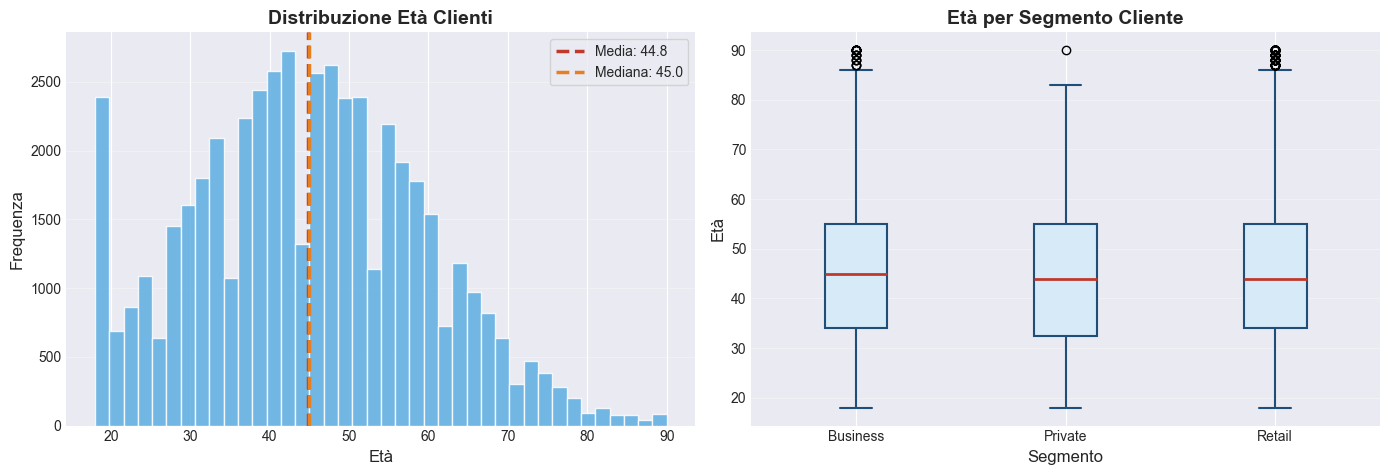

In [14]:
# Plot distribuzione età
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Istogramma età (migliorato)
axes[0].hist(
    df_clienti['eta'],
    bins=40,
    color='#5DADE2',          # blu chiaro leggibile
    edgecolor='white',        # bordi chiari
    alpha=0.85
)

# Linea età media
axes[0].axvline(
    df_clienti['eta'].mean(),
    color='#C0392B',          # rosso deciso
    linestyle='--',
    linewidth=2.5,
    label=f"Media: {df_clienti['eta'].mean():.1f}"
)

# Linea età mediana
axes[0].axvline(
    df_clienti['eta'].median(),
    color='#E67E22',          # arancione caldo
    linestyle='--',
    linewidth=2.5,
    label=f"Mediana: {df_clienti['eta'].median():.1f}"
)

axes[0].set_xlabel('Età', fontsize=12)
axes[0].set_ylabel('Frequenza', fontsize=12)
axes[0].set_title('Distribuzione Età Clienti', fontsize=14, fontweight='bold')
axes[0].legend(frameon=True)
axes[0].grid(axis='y', alpha=0.3)

# Box plot età per segmento
df_clienti.boxplot(
    column='eta',
    by='segmento',
    ax=axes[1],
    patch_artist=True,
    boxprops=dict(facecolor='#D6EAF8', edgecolor='#1F4E79', linewidth=1.5),
    medianprops=dict(color='#C0392B', linewidth=2),
    whiskerprops=dict(color='#1F4E79', linewidth=1.5),
    capprops=dict(color='#1F4E79', linewidth=1.5)
)

axes[1].set_xlabel('Segmento', fontsize=12)
axes[1].set_ylabel('Età', fontsize=12)
axes[1].set_title('Età per Segmento Cliente', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()

### Età media per segmento

A supporto dell’analisi grafica, viene calcolata l’età media dei clienti
per ciascun segmento di clientela.

Questa misura consente:
- un confronto quantitativo immediato tra i segmenti
- l’individuazione di target anagrafici prevalenti
- il supporto a strategie di marketing e offerta personalizzata

In [15]:
# Età media per segmento di clientela
eta_media_segmento = (
    df_clienti
    .groupby('segmento')['eta']
    .mean()
    .round(2)
)

eta_media_segmento

segmento
Business   44.77
Private    43.96
Retail     44.82
Name: eta, dtype: float64

### Visualizzazione dell’età media per segmento

Il grafico a barre permette di confrontare visivamente l’età media
dei clienti appartenenti ai diversi segmenti.

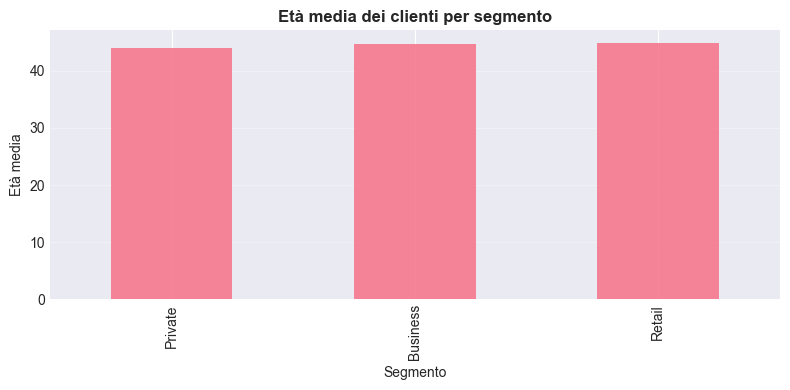

In [16]:
plt.figure(figsize=(8, 4))

eta_media_segmento.sort_values().plot(
    kind='bar',
    alpha=0.85
)

plt.xlabel('Segmento')
plt.ylabel('Età media')
plt.title('Età media dei clienti per segmento', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Distribuzione del reddito annuo dei clienti (scala logaritmica)

In questa sezione viene analizzata la **distribuzione del reddito annuo**
dei clienti, utilizzando una **scala logaritmica** per gestire l’elevata
variabilità dei valori.

I grafici mostrati sono:

- **Istogramma del reddito** (a sinistra):
  - rappresenta la frequenza dei redditi annui
  - la **linea rossa tratteggiata** indica il valore medio
  - la **linea arancione tratteggiata** indica il valore mediano
  - il confronto tra media e mediana consente di valutare la presenza
    di asimmetrie nella distribuzione

- **Violin plot per segmento** (a destra):
  - mostra la distribuzione del reddito per ciascun segmento di clientela
  - la **scala logaritmica sull’asse Y** permette di confrontare segmenti
    con redditi molto differenti
  - evidenzia densità, variabilità e possibili differenze strutturali
    tra segmenti

Questa analisi è utile per comprendere il potere di spesa dei clienti
e supportare strategie di segmentazione e pricing.

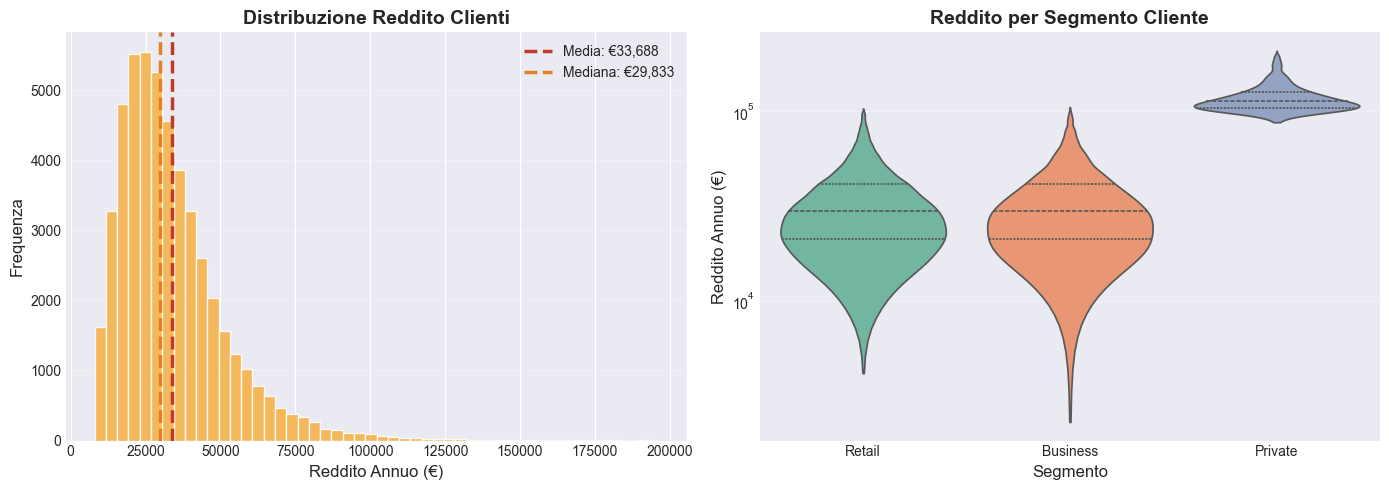

In [17]:
# Plot distribuzione reddito (scala logaritmica)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Istogramma reddito
axes[0].hist(
    df_clienti['reddito_annuo'],
    bins=50,
    color='#F5B041',          # arancione più soft
    edgecolor='white',
    alpha=0.85
)

axes[0].axvline(
    df_clienti['reddito_annuo'].mean(),
    color='#C0392B',
    linestyle='--',
    linewidth=2.5,
    label=f"Media: €{df_clienti['reddito_annuo'].mean():,.0f}"
)

axes[0].axvline(
    df_clienti['reddito_annuo'].median(),
    color='#E67E22',
    linestyle='--',
    linewidth=2.5,
    label=f"Mediana: €{df_clienti['reddito_annuo'].median():,.0f}"
)

axes[0].set_xlabel('Reddito Annuo (€)', fontsize=12)
axes[0].set_ylabel('Frequenza', fontsize=12)
axes[0].set_title('Distribuzione Reddito Clienti', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Violin plot reddito per segmento
sns.violinplot(
    data=df_clienti,
    x='segmento',
    y='reddito_annuo',
    ax=axes[1],
    palette='Set2',
    inner='quartile'
)

axes[1].set_xlabel('Segmento', fontsize=12)
axes[1].set_ylabel('Reddito Annuo (€)', fontsize=12)
axes[1].set_title('Reddito per Segmento Cliente', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Statistiche di reddito per segmento

Per completare l’analisi grafica, vengono calcolate alcune statistiche
descrittive del reddito annuo per ciascun segmento di clientela.

In [18]:
# Statistiche reddito per segmento
reddito_stats = (
    df_clienti
    .groupby('segmento')['reddito_annuo']
    .agg(['mean', 'median', 'min', 'max'])
    .round(0)
)

reddito_stats

,mean,median,min,max
segmento,,,,
Business,"33,281.00","29,880.00","8,000.00","99,898.00"
Private,"119,401.00","112,962.00","100,017.00","196,189.00"
Retail,"33,013.00","29,668.00","8,000.00","99,844.00"


### 3.4 Credit Score Analysis

## Classificazione del Credit Score

In questa sezione analizziamo il *credit score* dei clienti, suddividendolo
in classi qualitative:

- Molto Basso
- Basso
- Medio
- Buono
- Eccellente

L’obiettivo è:
- rendere il credit score più interpretabile
- analizzare la distribuzione dei valori
- osservare la composizione percentuale delle classi
- valutare la relazione con reddito ed età

In [19]:
# Funzione di classificazione del credit score
def classify_credit_score(score):
    if score < 500:
        return 'Molto Basso (<500)'
    elif score < 600:
        return 'Basso (500-599)'
    elif score < 700:
        return 'Medio (600-699)'
    elif score < 800:
        return 'Buono (700-799)'
    else:
        return 'Eccellente (800+)'

In [20]:
# Applicazione della classificazione al DataFrame
df_clienti['credit_score_class'] = (
    df_clienti['credit_score']
    .apply(classify_credit_score)
)

## Visualizzazione del Credit Score

In questa sezione il credit score dei clienti viene analizzato attraverso
due visualizzazioni affiancate:

- **Istogramma del credit score** (a sinistra)  
  Mostra la distribuzione dei valori e il valore medio complessivo.

- **Grafico a barre per classe di credit score** (a destra)  
  Rappresenta il numero e la percentuale di clienti in ciascuna classe
  di rischio, consentendo un confronto immediato tra i diversi profili.

L’utilizzo di grafici affiancati facilita il confronto tra distribuzione
complessiva e classificazione per classi di rischio.

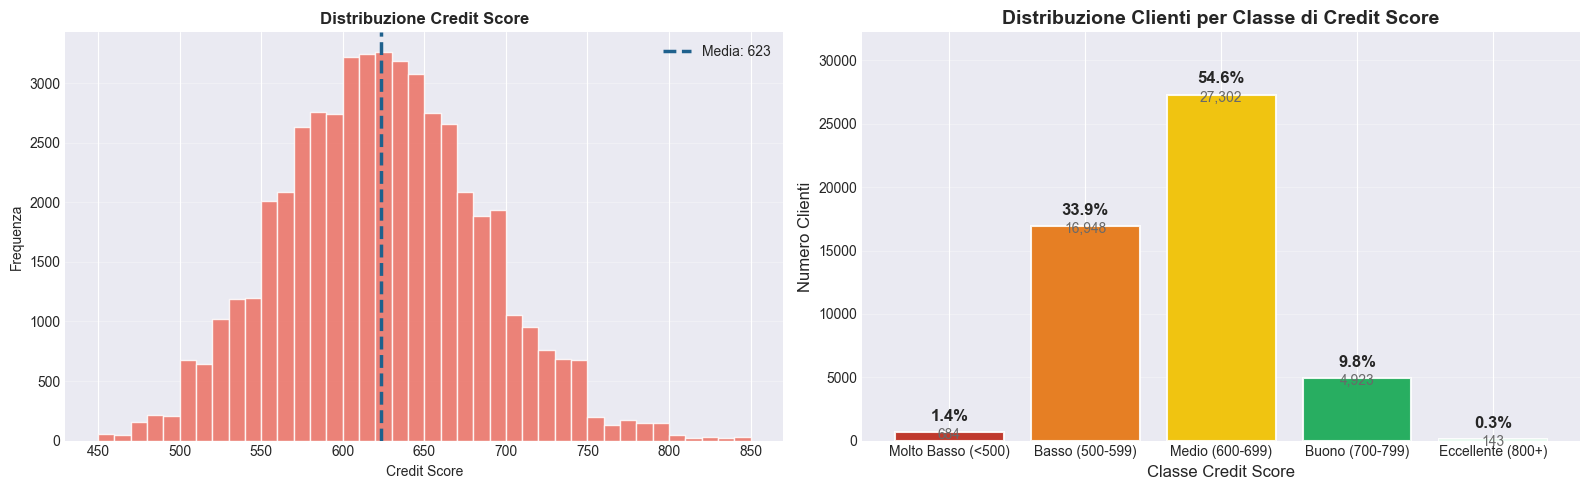

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# GRAFICO 1: ISTOGRAMMA CREDIT SCORE

axes[0].hist(
    df_clienti['credit_score'],
    bins=40,
    color='#EC7063',
    edgecolor='white',
    alpha=0.85
)

axes[0].axvline(
    df_clienti['credit_score'].mean(),
    color='#1F618D',
    linestyle='--',
    linewidth=2.5,
    label=f"Media: {df_clienti['credit_score'].mean():.0f}"
)

axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Frequenza')
axes[0].set_title('Distribuzione Credit Score', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)


# GRAFICO 2: BAR CHART CLASSI CREDIT SCORE

# Ordine logico delle classi (rischio → affidabilità)
order = [
    'Molto Basso (<500)',
    'Basso (500-599)',
    'Medio (600-699)',
    'Buono (700-799)',
    'Eccellente (800+)'
]

# Conteggio clienti per classe
credit_counts = (
    df_clienti['credit_score_class']
    .value_counts()
    .reindex(order)
)

# Percentuali
credit_pct = credit_counts / credit_counts.sum() * 100

# Colori semantici
colors = [
    '#C0392B',  # Molto Basso
    '#E67E22',  # Basso
    '#F1C40F',  # Medio
    '#27AE60',  # Buono
    '#2ECC71'   # Eccellente
]

bars = axes[1].bar(
    credit_counts.index,
    credit_counts.values,
    color=colors,
    alpha=0.9
)

# Etichette sopra le barre
bars = axes[1].bar(
    credit_counts.index,
    credit_counts.values,
    color=colors,
    alpha=0.9,
    edgecolor='white',
    linewidth=1.5
)

# Limite superiore asse Y (più spazio sopra)
y_max = credit_counts.max() * 1.18
axes[1].set_ylim(0, y_max)

# Offset dinamico per le etichette
offset_pct = y_max * 0.02
offset_val = y_max * 0.01

for bar, pct in zip(bars, credit_pct):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2

    # Percentuale (primary)
    axes[1].text(
        x,
        height + offset_pct,
        f"{pct:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

    # Numero clienti (secondary)
    axes[1].text(
        x,
        height + offset_val,
        f"{int(height):,}",
        ha='center',
        va='top',
        fontsize=10,
        color='dimgray'
    )

# Styling finale
axes[1].set_xlabel('Classe Credit Score', fontsize=12)
axes[1].set_ylabel('Numero Clienti', fontsize=12)
axes[1].set_title(
    'Distribuzione Clienti per Classe di Credit Score',
    fontsize=14,
    fontweight='bold'
)

axes[1].grid(axis='y', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

### 3.5 Distribuzione Geografica dei Clienti

In questa sezione viene analizzata la distribuzione geografica dei clienti
a livello provinciale.

Le visualizzazioni includono:

- **Distribuzione completa dei clienti per provincia**  
  Consente di individuare le aree con maggiore concentrazione di clientela.

- **Top 5 province per numero di clienti**  
  Evidenzia le province più rilevanti in termini di copertura,
  utili per valutazioni strategiche e commerciali.

Questa analisi supporta decisioni legate a presenza territoriale,
allocazione delle risorse e strategie di espansione.

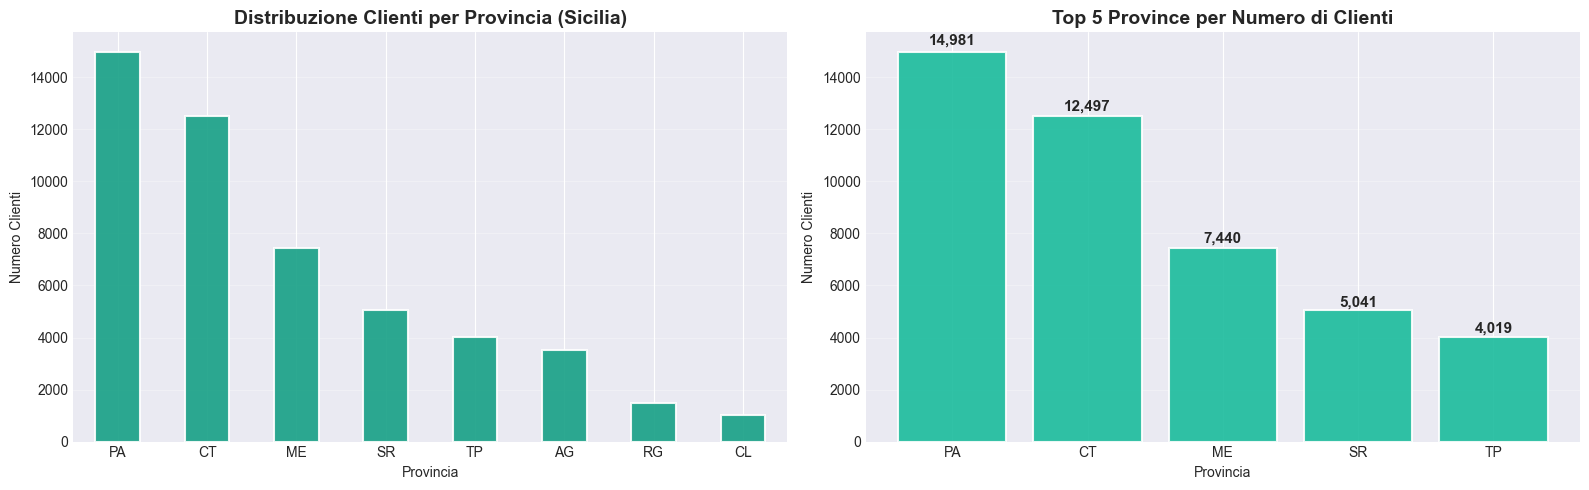

In [31]:
# Clienti per provincia
clienti_per_provincia = df_clienti['provincia'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))


# GRAFICO 1: CLIENTI PER PROVINCIA (COMPLETO)

clienti_per_provincia.plot(
    kind='bar',
    ax=axes[0],
    color='#16A085',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Numero Clienti')
axes[0].set_title(
    'Distribuzione Clienti per Provincia (Sicilia)',
    fontsize=14,
    fontweight='bold'
)

axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_axisbelow(True)


# GRAFICO 2: TOP 5 PROVINCE

top5 = clienti_per_provincia.head(5)

bars = axes[1].bar(
    top5.index,
    top5.values,
    color='#1ABC9C',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

axes[1].set_xlabel('Provincia')
axes[1].set_ylabel('Numero Clienti')
axes[1].set_title(
    'Top 5 Province per Numero di Clienti',
    fontsize=14,
    fontweight='bold'
)

axes[1].grid(axis='y', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

In [32]:
print("\nTop 5 Province per numero clienti:")
print(clienti_per_provincia.head())

copertura_top5 = clienti_per_provincia.head(5).sum() / len(df_clienti) * 100
print(f"\n% copertura Top 5: {copertura_top5:.1f}%")


Top 5 Province per numero clienti:
provincia
PA    14981
CT    12497
ME     7440
SR     5041
TP     4019
Name: count, dtype: int64

% copertura Top 5: 88.0%


## 4. Analisi Transazioni

### 4.1 Overview Transazioni

In questa sezione viene fornita una panoramica generale sulle transazioni
effettuate dai clienti, analizzando:

- il volume complessivo delle transazioni
- l’importo totale, medio e mediano
- il bilancio tra entrate e uscite
- la composizione percentuale dei movimenti

Queste informazioni consentono una prima valutazione dell’intensità
e della natura dei flussi finanziari.

In [42]:
# STATISTICHE GENERALI TRANSAZIONI

print("STATISTICHE TRANSAZIONI")

print(f"\nTotale transazioni: {len(df_transazioni):,}")
print(f"Importo totale: €{df_transazioni['importo'].sum():,.2f}")
print(f"Importo medio: €{df_transazioni['importo'].mean():,.2f}")
print(f"Importo mediano: €{df_transazioni['importo'].median():,.2f}")

STATISTICHE TRANSAZIONI

Totale transazioni: 91,541
Importo totale: €88,577,428.65
Importo medio: €967.63
Importo mediano: €110.89


### Bilancio Entrate e Uscite

Viene analizzato il bilancio complessivo dei movimenti, distinguendo
tra transazioni in **Avere** (entrate) e **Dare** (uscite).

Il saldo netto fornisce un’indicazione sintetica del flusso finanziario
complessivo.

In [41]:
# BILANCIO ENTRATE / USCITE

entrate = df_transazioni.loc[
    df_transazioni['tipo_movimento'] == 'Avere', 'importo'
].sum()

uscite = df_transazioni.loc[
    df_transazioni['tipo_movimento'] == 'Dare', 'importo'
].sum()

print("BILANCIO ENTRATE / USCITE")

print(f"\nTotale Entrate: €{entrate:,.2f}")
print(f"Totale Uscite: €{uscite:,.2f}")
print(f"Saldo Netto: €{entrate - uscite:,.2f}")

perc_entrate = (
    (df_transazioni['tipo_movimento'] == 'Avere').mean() * 100
)
perc_uscite = (
    (df_transazioni['tipo_movimento'] == 'Dare').mean() * 100
)

print(f"\n% Entrate: {perc_entrate:.1f}%")
print(f"% Uscite: {perc_uscite:.1f}%")

BILANCIO ENTRATE / USCITE

Totale Entrate: €82,085,871.81
Totale Uscite: €6,491,556.84
Saldo Netto: €75,594,314.97

% Entrate: 35.0%
% Uscite: 65.0%


### 4.2 Trend Temporale delle Transazioni

In questa sezione viene analizzata l’evoluzione temporale delle transazioni
su base mensile, considerando:

- il **numero di transazioni**
- il **volume totale movimentato**

L’analisi temporale permette di individuare pattern stagionali,
crescita o contrazione dell’attività transazionale.

In [40]:
# AGGREGAZIONE MENSILE TRANSAZIONI

df_transazioni['anno_mese'] = (
    df_transazioni['data_transazione'].dt.to_period('M')
)

transazioni_mensili = (
    df_transazioni
    .groupby('anno_mese')
    .agg(
        num_transazioni=('transazione_id', 'count'),
        volume_totale=('importo', 'sum')
    )
)

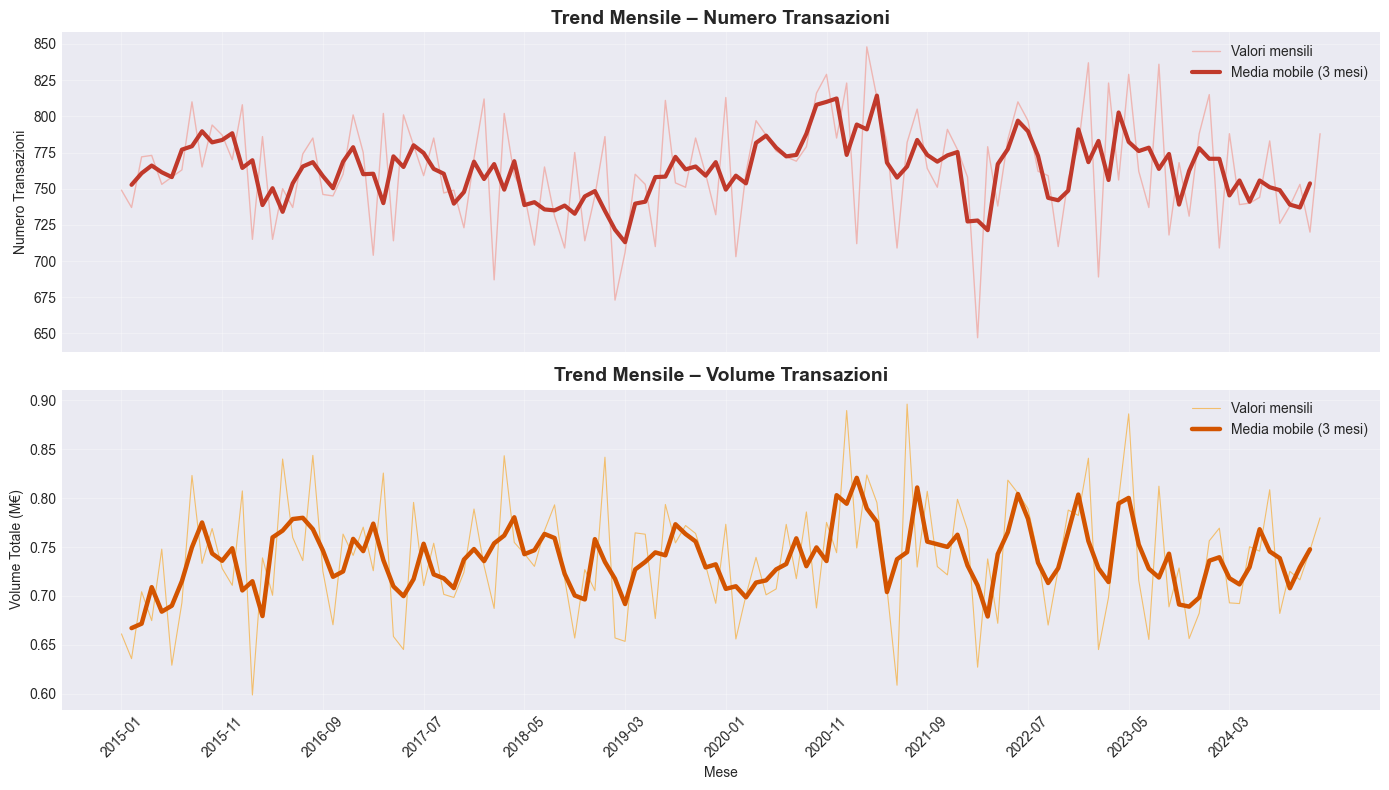

In [49]:
# TREND MENSILE TRANSAZIONI 

# Media mobile (3 mesi)
transazioni_mensili['num_transazioni_ma'] = (
    transazioni_mensili['num_transazioni']
    .rolling(window=3, center=True)
    .mean()
)

transazioni_mensili['volume_totale_ma'] = (
    transazioni_mensili['volume_totale']
    .rolling(window=3, center=True)
    .mean()
)

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

x = transazioni_mensili.index.astype(str)


# NUMERO TRANSAZIONI

axes[0].plot(
    x,
    transazioni_mensili['num_transazioni'],
    color='#F1948A',
    linewidth=1,
    alpha=0.6,
    label='Valori mensili'
)

axes[0].plot(
    x,
    transazioni_mensili['num_transazioni_ma'],
    color='#C0392B',
    linewidth=3,
    label='Media mobile (3 mesi)'
)

axes[0].set_ylabel('Numero Transazioni')
axes[0].set_title(
    'Trend Mensile – Numero Transazioni',
    fontsize=14,
    fontweight='bold'
)
axes[0].legend()
axes[0].grid(alpha=0.3)


# VOLUME TRANSAZIONI

axes[1].plot(
    x,
    transazioni_mensili['volume_totale'] / 1e6,
    color='#F5B041',      
    linewidth=0.8,
    alpha=0.75,
    label='Valori mensili'
)

axes[1].plot(
    x,
    transazioni_mensili['volume_totale_ma'] / 1e6,
    color='#D35400',      
    linewidth=3.2,
    label='Media mobile (3 mesi)'
)

axes[1].set_xlabel('Mese')
axes[1].set_ylabel('Volume Totale (M€)')
axes[1].set_title(
    'Trend Mensile – Volume Transazioni',
    fontsize=14,
    fontweight='bold'
)
axes[1].legend()
axes[1].grid(alpha=0.3)


# RIDUZIONE TICK ASSE X

step = max(len(x) // 12, 1)   # ~1 tick ogni anno
axes[1].set_xticks(x[::step])
axes[1].set_xticklabels(x[::step], rotation=45)

plt.tight_layout()
plt.show()

### 4.3 Categorie delle Transazioni

In questa sezione vengono analizzate le categorie delle transazioni,
con l’obiettivo di individuare:

- le categorie più frequenti in termini di numero di operazioni
- le categorie che generano il maggior volume economico

L’analisi congiunta di frequenza e volume consente di distinguere
tra categorie ad alta operatività e categorie ad alto impatto economico.

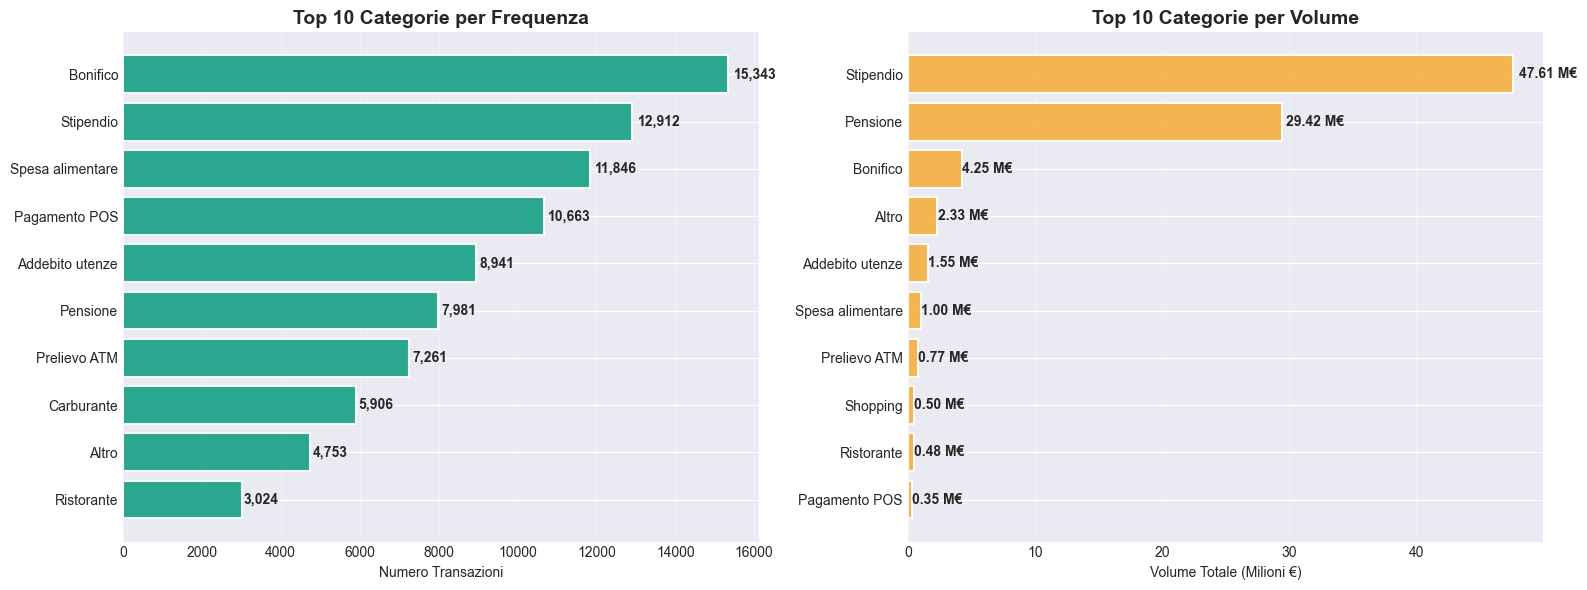

In [50]:
# CATEGORIE TRANSAZIONI


# Top 10 categorie per frequenza
categorie_freq = (
    df_transazioni['categoria']
    .value_counts()
    .head(10)
    .sort_values()   # per barh ordinate correttamente
)

# Top 10 categorie per volume
volume_per_categoria = (
    df_transazioni
    .groupby('categoria')['importo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .sort_values()
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# FREQUENZA TRANSAZIONI

axes[0].barh(
    categorie_freq.index,
    categorie_freq.values,
    color='#16A085',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(categorie_freq.values):
    axes[0].text(
        v * 1.01,
        i,
        f"{v:,}",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

axes[0].set_xlabel('Numero Transazioni')
axes[0].set_title(
    'Top 10 Categorie per Frequenza',
    fontsize=14,
    fontweight='bold'
)
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_axisbelow(True)


# VOLUME TRANSAZIONI

axes[1].barh(
    volume_per_categoria.index,
    volume_per_categoria.values / 1e6,
    color='#F5B041',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(volume_per_categoria.values / 1e6):
    axes[1].text(
        v * 1.01,
        i,
        f"{v:.2f} M€",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

axes[1].set_xlabel('Volume Totale (Milioni €)')
axes[1].set_title(
    'Top 10 Categorie per Volume',
    fontsize=14,
    fontweight='bold'
)
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

In [51]:
print("\nTop 5 categorie per numero transazioni:")
print(categorie_freq.sort_values(ascending=False).head())


Top 5 categorie per numero transazioni:
categoria
Bonifico            15343
Stipendio           12912
Spesa alimentare    11846
Pagamento POS       10663
Addebito utenze      8941
Name: count, dtype: int64


### 4.4 Canali di Utilizzo

In questa sezione viene analizzato l’utilizzo dei diversi canali di
transazione, con l’obiettivo di:

- valutare la distribuzione delle transazioni per canale
- confrontare l’importo medio delle operazioni
- stimare il livello di adozione dei canali digitali

Questa analisi è utile per comprendere le abitudini operative dei clienti
e supportare strategie di digitalizzazione e ottimizzazione dei canali.

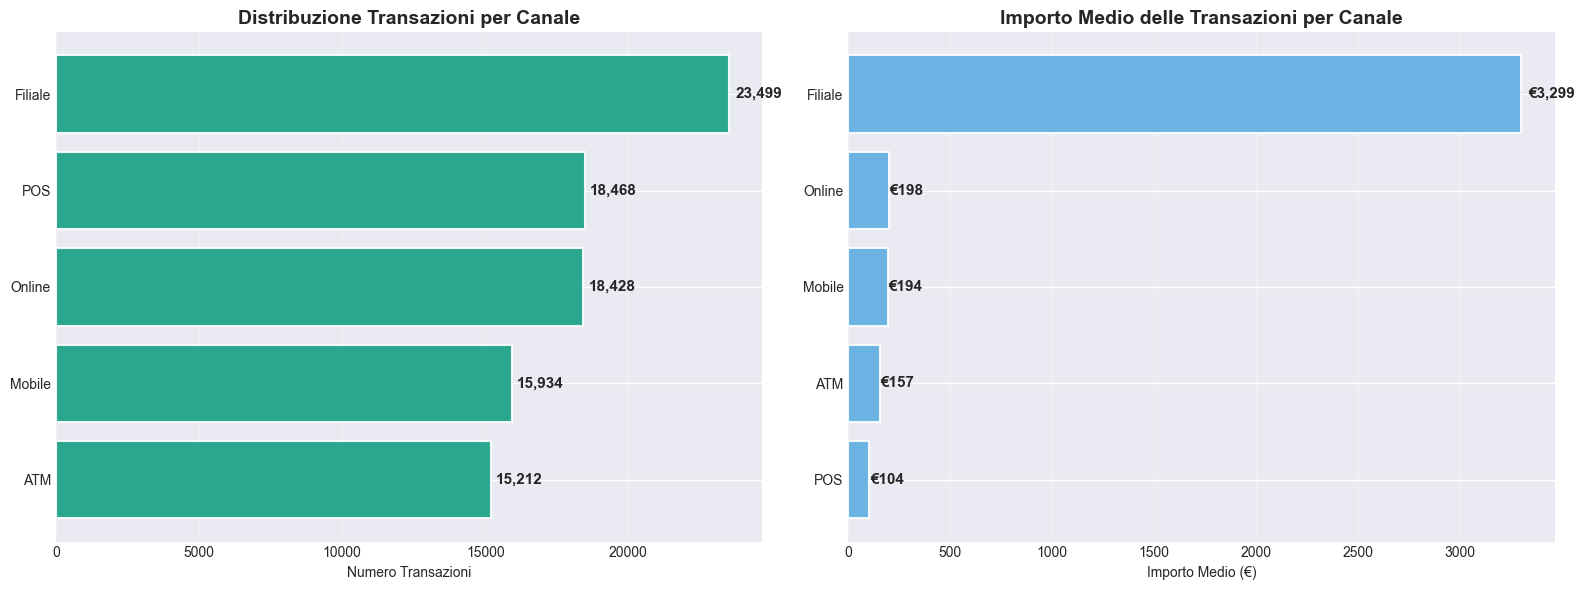

In [52]:
# CANALI DI UTILIZZO TRANSAZIONI

# Distribuzione transazioni per canale
canali = (
    df_transazioni['canale']
    .value_counts()
    .sort_values()
)

# Importo medio per canale
importo_medio_canale = (
    df_transazioni
    .groupby('canale')['importo']
    .mean()
    .sort_values()
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# GRAFICO 1: DISTRIBUZIONE TRANSAZIONI PER CANALE

axes[0].barh(
    canali.index,
    canali.values,
    color='#16A085',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(canali.values):
    axes[0].text(
        v * 1.01,
        i,
        f"{v:,}",
        va='center',
        fontsize=11,
        fontweight='bold'
    )

axes[0].set_xlabel('Numero Transazioni')
axes[0].set_title(
    'Distribuzione Transazioni per Canale',
    fontsize=14,
    fontweight='bold'
)
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_axisbelow(True)


# GRAFICO 2: IMPORTO MEDIO PER CANALE

axes[1].barh(
    importo_medio_canale.index,
    importo_medio_canale.values,
    color='#5DADE2',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(importo_medio_canale.values):
    axes[1].text(
        v * 1.01,
        i,
        f"€{v:,.0f}",
        va='center',
        fontsize=11,
        fontweight='bold'
    )

axes[1].set_xlabel('Importo Medio (€)')
axes[1].set_title(
    'Importo Medio delle Transazioni per Canale',
    fontsize=14,
    fontweight='bold'
)
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

In [53]:
# DIGITAL ADOPTION RATE

digital_channels = ['Online', 'Mobile']

digital_trans = df_transazioni[
    df_transazioni['canale'].isin(digital_channels)
]

digital_rate = len(digital_trans) / len(df_transazioni) * 100

print(f"\nDigital Adoption Rate: {digital_rate:.1f}%")
print(f"Transazioni digitali: {len(digital_trans):,}")
print(f"Transazioni fisiche: {len(df_transazioni) - len(digital_trans):,}")



Digital Adoption Rate: 37.5%
Transazioni digitali: 34,362
Transazioni fisiche: 57,179


### 4.5 Fraud Detection

In questa sezione viene analizzata la presenza di **transazioni sospette**
all’interno del dataset, con l’obiettivo di:

- stimare il tasso di frode complessivo (*fraud rate*)
- confrontare importi medi tra transazioni normali e sospette
- analizzare la distribuzione degli importi
- individuare i canali maggiormente coinvolti in operazioni sospette

Questa analisi fornisce una prima base quantitativa per valutazioni di
rischio operativo e antifrode.

In [56]:
# FRAUD DETECTION - KPI

# Maschere esplicite (0 / 1)
mask_frode = df_transazioni['flag_sospetta'] == 1
mask_normali = df_transazioni['flag_sospetta'] == 0

sospette = df_transazioni[mask_frode]

tot_trans = len(df_transazioni)
num_frodi = mask_frode.sum()
fraud_rate = num_frodi / tot_trans * 100

print("FRAUD DETECTION ANALYSIS")

print(f"\nTransazioni totali: {tot_trans:,}")
print(f"Transazioni sospette: {num_frodi:,}")
print(f"Fraud Rate: {fraud_rate:.3f}%")

importo_normali = df_transazioni.loc[mask_normali, 'importo'].mean()
importo_sospette = sospette['importo'].mean()

print(f"\nImporto medio transazioni normali: €{importo_normali:,.2f}")
print(f"Importo medio transazioni sospette: €{importo_sospette:,.2f}")

FRAUD DETECTION ANALYSIS

Transazioni totali: 91,541
Transazioni sospette: 8
Fraud Rate: 0.009%

Importo medio transazioni normali: €967.18
Importo medio transazioni sospette: €6,123.58


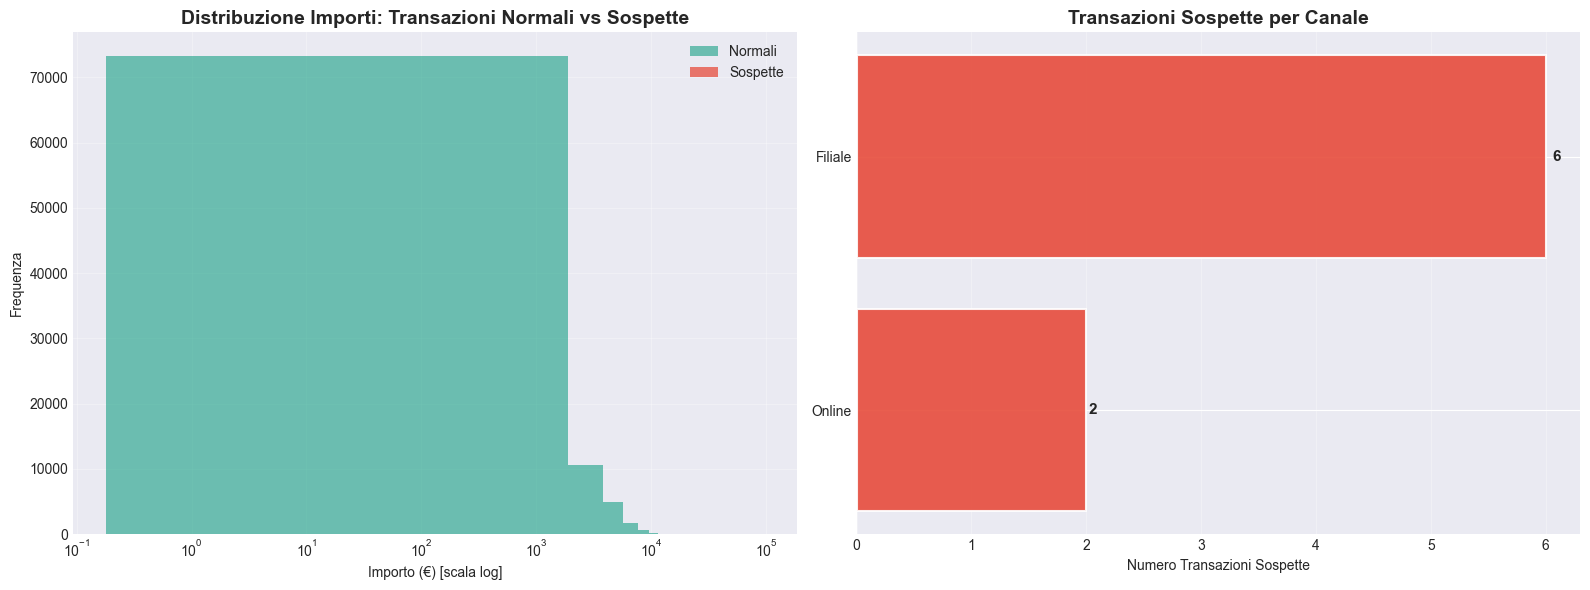

In [58]:
# ANALISI GRAFICA FRODI

# Maschere sicure
mask_frode = df_transazioni['flag_sospetta'] == 1
mask_normali = df_transazioni['flag_sospetta'] == 0

sospette = df_transazioni[mask_frode]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# DISTRIBUZIONE IMPORTI (SCALA LOG)

axes[0].hist(
    df_transazioni.loc[mask_normali, 'importo'],
    bins=50,
    alpha=0.6,
    label='Normali',
    color='#16A085'
)

axes[0].hist(
    sospette['importo'],
    bins=50,
    alpha=0.75,
    label='Sospette',
    color='#E74C3C'
)

axes[0].set_xscale('log')
axes[0].set_xlabel('Importo (€) [scala log]')
axes[0].set_ylabel('Frequenza')
axes[0].set_title(
    'Distribuzione Importi: Transazioni Normali vs Sospette',
    fontsize=14,
    fontweight='bold'
)
axes[0].legend()
axes[0].grid(alpha=0.3)

# FRODI PER CANALE

frodi_per_canale = (
    sospette['canale']
    .value_counts()
    .sort_values()
)

axes[1].barh(
    frodi_per_canale.index,
    frodi_per_canale.values,
    color='#E74C3C',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(frodi_per_canale.values):
    axes[1].text(
        v * 1.01,
        i,
        f"{v:,}",
        va='center',
        fontsize=11,
        fontweight='bold'
    )

axes[1].set_xlabel('Numero Transazioni Sospette')
axes[1].set_title(
    'Transazioni Sospette per Canale',
    fontsize=14,
    fontweight='bold'
)
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

## 5. Analisi Prestiti

### 5.1 Overview Prestiti

In questa sezione viene fornita una panoramica generale sui prestiti
erogati, analizzando:

- il numero complessivo di prestiti
- l’importo totale erogato
- l’importo medio dei prestiti
- l’importo residuo complessivo

L’obiettivo è comprendere la dimensione e l’esposizione complessiva
del portafoglio prestiti.

In [59]:
print("STATISTICHE PRESTITI")

print(f"\nTotale prestiti: {len(df_prestiti):,}")
print(f"Importo totale erogato: €{df_prestiti['importo_erogato'].sum():,.2f}")
print(f"Importo medio prestito: €{df_prestiti['importo_erogato'].mean():,.2f}")
print(f"Importo residuo totale: €{df_prestiti['importo_residuo'].sum():,.2f}")

STATISTICHE PRESTITI

Totale prestiti: 15,000
Importo totale erogato: €1,135,210,638.30
Importo medio prestito: €75,680.71
Importo residuo totale: €581,387,789.31


### Tipologie di Prestito

Viene analizzata la distribuzione delle diverse tipologie di prestito,
per comprendere la composizione del portafoglio e identificare
le forme di finanziamento più diffuse.

In [60]:
print("TIPOLOGIE PRESTITI")

print(df_prestiti['tipo_prestito'].value_counts())

TIPOLOGIE PRESTITI
tipo_prestito
Personale    5938
Mutuo        4543
Auto         3007
Aziendale    1512
Name: count, dtype: int64


### Importo medio per tipologia di prestito

L’analisi dell’importo medio erogato per ciascuna tipologia di prestito
consente di distinguere tra prodotti a basso e alto impatto economico.

In [61]:
# IMPORTO MEDIO PER TIPOLOGIA

importo_medio_tipo = (
    df_prestiti
    .groupby('tipo_prestito')['importo_erogato']
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

print("\nImporto medio per tipo:")
print(importo_medio_tipo)


Importo medio per tipo:
tipo_prestito
Mutuo       174,187.97
Aziendale   107,964.71
Auto         25,120.32
Personale    17,698.76
Name: importo_erogato, dtype: float64


### 5.2 NPL Analysis (CRITICO)

In questa sezione viene analizzato il livello di **Non-Performing Loans (NPL)**,
una delle metriche più critiche nel settore bancario.

L’analisi si concentra su:
- la classificazione complessiva dei prestiti
- il calcolo dell’**NPL Ratio**
- il confronto con un benchmark di riferimento (Italia)
- l’identificazione delle tipologie di prestito maggiormente esposte al rischio

Questa sezione è centrale per valutazioni di solidità del portafoglio crediti
e rischio di credito.

In [65]:
# NPL ANALYSIS - KPI

print("NPL (NON-PERFORMING LOANS) ANALYSIS")

classificazione = df_prestiti['classificazione'].value_counts()

print("\nClassificazione prestiti:")
print(classificazione)

tot_prestiti = len(df_prestiti)
num_npl = classificazione.get('NPL', 0)

npl_ratio = num_npl / tot_prestiti * 100
benchmark_italia = 8.0

print(f"NPL RATIO: {npl_ratio:.2f}%")
print(f"Benchmark Italia: {benchmark_italia:.1f}%")
print(f"Scostamento: {npl_ratio - benchmark_italia:+.2f}%")

NPL (NON-PERFORMING LOANS) ANALYSIS

Classificazione prestiti:
classificazione
Performing    12485
Past due       1302
NPL            1213
Name: count, dtype: int64
NPL RATIO: 8.09%
Benchmark Italia: 8.0%
Scostamento: +0.09%


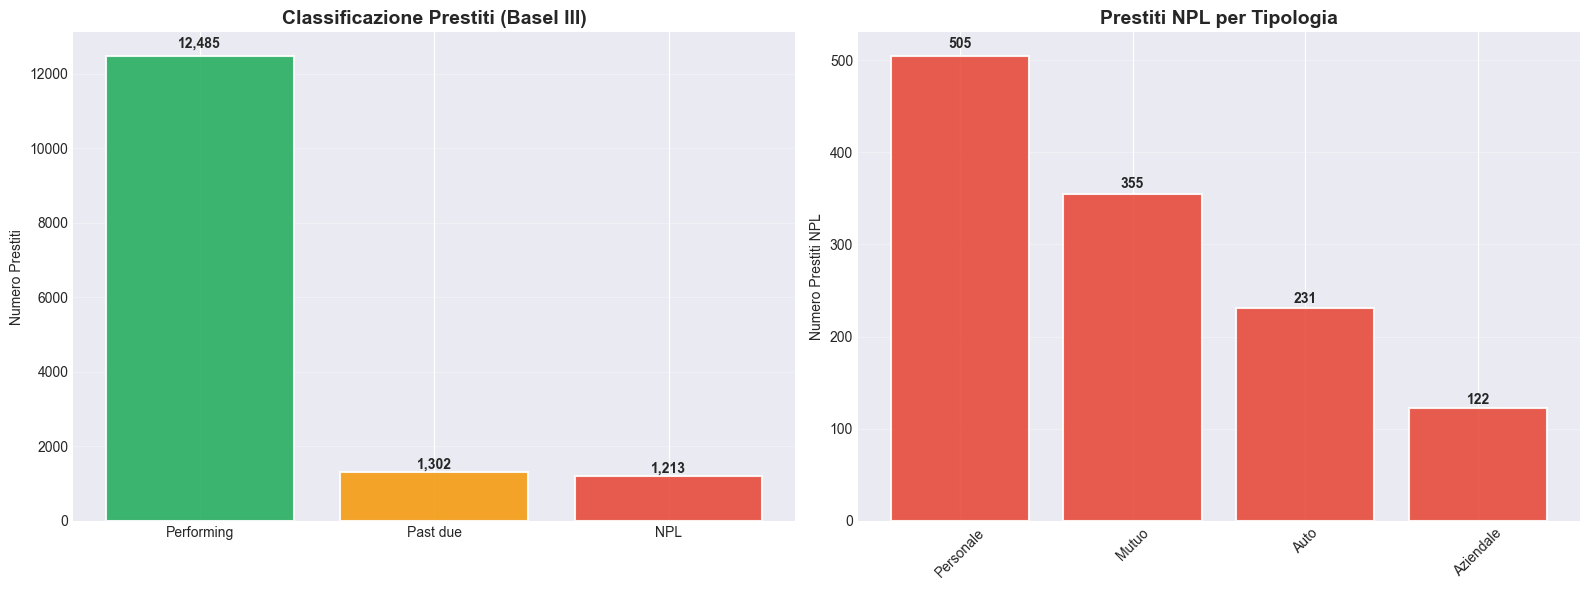

In [66]:
 # COMPOSIZIONE PRESTITI

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(
    classificazione.index,
    classificazione.values,
    color=['#27AE60', '#F39C12', '#E74C3C'],
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(classificazione.values):
    axes[0].text(
        i,
        v * 1.01,
        f"{v:,}",
        ha='center',
        va='bottom',
        fontweight='bold'
    )

axes[0].set_ylabel('Numero Prestiti')
axes[0].set_title(
    'Classificazione Prestiti (Basel III)',
    fontsize=14,
    fontweight='bold'
)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_axisbelow(True)

# NPL PER TIPOLOGIA

npl_per_tipo = (
    df_prestiti[df_prestiti['classificazione'] == 'NPL']
    ['tipo_prestito']
    .value_counts()
)

axes[1].bar(
    npl_per_tipo.index,
    npl_per_tipo.values,
    color='#E74C3C',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(npl_per_tipo.values):
    axes[1].text(
        i,
        v * 1.01,
        f"{v:,}",
        ha='center',
        va='bottom',
        fontweight='bold'
    )

axes[1].set_ylabel('Numero Prestiti NPL')
axes[1].set_title(
    'Prestiti NPL per Tipologia',
    fontsize=14,
    fontweight='bold'
)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

In [67]:
print("\nNPL Ratio per tipo prestito:")

for tipo in df_prestiti['tipo_prestito'].unique():
    tipo_df = df_prestiti[df_prestiti['tipo_prestito'] == tipo]
    tot_tipo = len(tipo_df)
    npl_tipo = (tipo_df['classificazione'] == 'NPL').sum()
    ratio = npl_tipo / tot_tipo * 100 if tot_tipo > 0 else 0

    print(f"{tipo:20s}: {ratio:6.2f}% ({npl_tipo}/{tot_tipo})")


NPL Ratio per tipo prestito:
Personale           :   8.50% (505/5938)
Mutuo               :   7.81% (355/4543)
Aziendale           :   8.07% (122/1512)
Auto                :   7.68% (231/3007)


### 5.3 Tassi di Interesse e Durata dei Prestiti

In questa sezione vengono analizzate le principali caratteristiche
finanziarie dei prestiti, con particolare attenzione a:

- la distribuzione dei tassi di interesse applicati
- le differenze di tasso tra le diverse tipologie di prestito
- la durata dei finanziamenti
- la relazione tra importo erogato e tasso di interesse

L’obiettivo è valutare la coerenza delle condizioni applicate
rispetto al profilo di rischio e alla struttura dei prodotti.

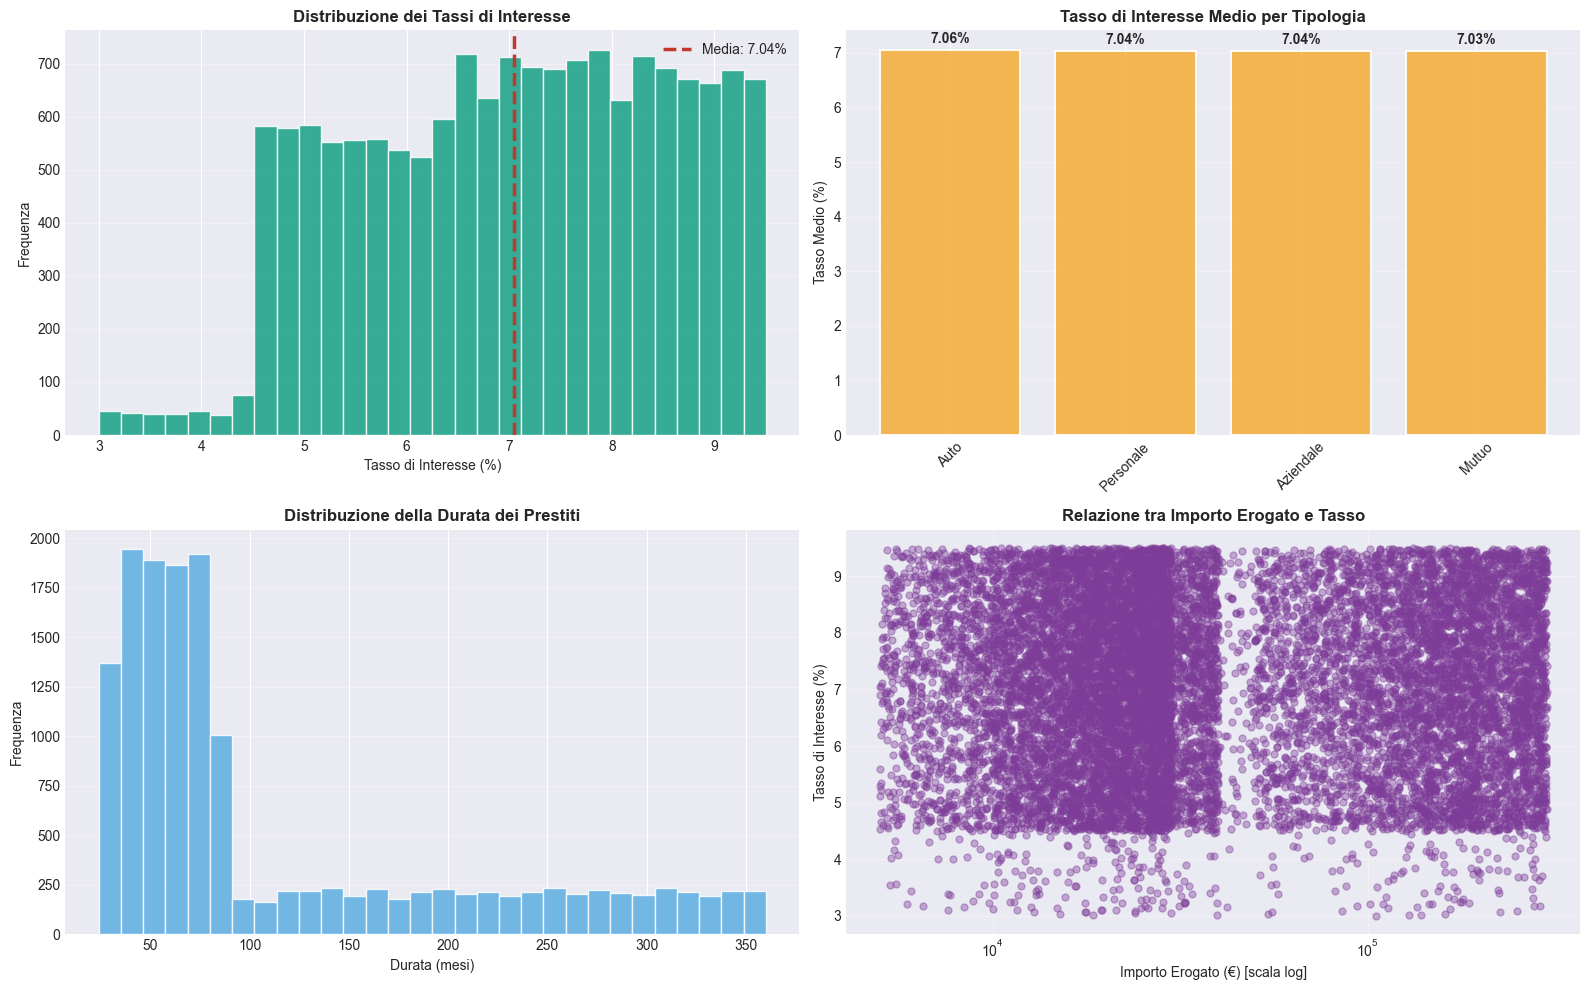

In [68]:
# TASSI DI INTERESSE E DURATA

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. DISTRIBUZIONE TASSI DI INTERESSE

axes[0, 0].hist(
    df_prestiti['tasso_interesse'],
    bins=30,
    color='#16A085',
    edgecolor='white',
    alpha=0.85
)

axes[0, 0].axvline(
    df_prestiti['tasso_interesse'].mean(),
    color='#C0392B',
    linestyle='--',
    linewidth=2.5,
    label=f"Media: {df_prestiti['tasso_interesse'].mean():.2f}%"
)

axes[0, 0].set_xlabel('Tasso di Interesse (%)')
axes[0, 0].set_ylabel('Frequenza')
axes[0, 0].set_title('Distribuzione dei Tassi di Interesse', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. TASSO MEDIO PER TIPOLOGIA

tasso_medio_tipo = (
    df_prestiti
    .groupby('tipo_prestito')['tasso_interesse']
    .mean()
    .sort_values(ascending=False)
)

axes[0, 1].bar(
    tasso_medio_tipo.index,
    tasso_medio_tipo.values,
    color='#F5B041',
    edgecolor='white',
    linewidth=1.5,
    alpha=0.9
)

for i, v in enumerate(tasso_medio_tipo.values):
    axes[0, 1].text(
        i,
        v * 1.01,
        f"{v:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

axes[0, 1].set_ylabel('Tasso Medio (%)')
axes[0, 1].set_title('Tasso di Interesse Medio per Tipologia', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_axisbelow(True)

# 3. DISTRIBUZIONE DURATA PRESTITI

axes[1, 0].hist(
    df_prestiti['durata_mesi'],
    bins=30,
    color='#5DADE2',
    edgecolor='white',
    alpha=0.85
)

axes[1, 0].set_xlabel('Durata (mesi)')
axes[1, 0].set_ylabel('Frequenza')
axes[1, 0].set_title('Distribuzione della Durata dei Prestiti', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)


# 4. IMPORTO VS TASSO (SCATTER PULITO)

axes[1, 1].scatter(
    df_prestiti['importo_erogato'],
    df_prestiti['tasso_interesse'],
    alpha=0.4,
    s=25,
    color='#7D3C98'
)

axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Importo Erogato (€) [scala log]')
axes[1, 1].set_ylabel('Tasso di Interesse (%)')
axes[1, 1].set_title('Relazione tra Importo Erogato e Tasso', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Spunto interpretativo 

I tassi di interesse mostrano una distribuzione relativamente concentrata,
con differenze significative tra le diverse tipologie di prestito.
La relazione tra importo erogato e tasso non evidenzia una correlazione
lineare forte, suggerendo che il pricing dipende anche da altri fattori
di rischio e di prodotto.

## 6. Insights Finali e Conclusioni

In questa sezione vengono sintetizzati i principali risultati emersi
dall’analisi esplorativa dei dati relativi a clienti, transazioni e prestiti.

L’obiettivo è fornire una visione d’insieme utile a supportare
decisioni strategiche, operative e di gestione del rischio.

In [70]:
# INSIGHTS PRINCIPALI - BANCA TRINACRIA

print("INSIGHTS PRINCIPALI - BANCA TRINACRIA")


# CLIENTI

print("\n CLIENTI")

print(f"• Età media clienti: {df_clienti['eta'].mean():.1f} anni")
print(f"• Reddito mediano: €{df_clienti['reddito_annuo'].median():,.0f}")
print(f"• Credit score medio: {df_clienti['credit_score'].mean():.0f}")

segmento_principale = df_clienti['segmento'].mode()[0]
perc_segmento = (
    df_clienti['segmento']
    .value_counts(normalize=True)
    .iloc[0] * 100
)

print(f"• Segmento prevalente: {segmento_principale} ({perc_segmento:.1f}%)")


# TRANSAZIONI

print("\n TRANSAZIONI")

print(f"• Volume totale transazioni: €{df_transazioni['importo'].sum():,.0f}")
print(f"• Digital adoption rate: {digital_rate:.1f}%")
print(f"• Fraud rate: {len(sospette) / len(df_transazioni) * 100:.3f}%")
print(f"• Categoria principale: {df_transazioni['categoria'].mode()[0]}")

# PRESTITI

print("\n PRESTITI")

print(f"• NPL Ratio: {npl_ratio:.2f}% (Benchmark: 8.0%)")
print(f"• Importo medio prestito: €{df_prestiti['importo_erogato'].mean():,.0f}")
print(f"• Tasso medio applicato: {df_prestiti['tasso_interesse'].mean():.2f}%")
print(f"• Tipologia principale: {df_prestiti['tipo_prestito'].mode()[0]}")

# GEOGRAFIA

print("\n DISTRIBUZIONE GEOGRAFICA")

provincia_principale = clienti_per_provincia.index[0]
num_clienti_principale = clienti_per_provincia.iloc[0]

concentrazione_top3 = (
    clienti_per_provincia.head(3).sum()
    / len(df_clienti) * 100
)

print(
    f"• Provincia principale: {provincia_principale} "
    f"({num_clienti_principale:,} clienti)"
)
print(f"• Concentrazione Top 3 province: {concentrazione_top3:.1f}%")


print("✓ ANALISI ESPLORATIVA COMPLETATA CON SUCCESSO")

INSIGHTS PRINCIPALI - BANCA TRINACRIA

 CLIENTI
• Età media clienti: 44.8 anni
• Reddito mediano: €29,833
• Credit score medio: 623
• Segmento prevalente: Retail (86.4%)

 TRANSAZIONI
• Volume totale transazioni: €88,577,429
• Digital adoption rate: 37.5%
• Fraud rate: 0.009%
• Categoria principale: Bonifico

 PRESTITI
• NPL Ratio: 8.09% (Benchmark: 8.0%)
• Importo medio prestito: €75,681
• Tasso medio applicato: 7.04%
• Tipologia principale: Personale

 DISTRIBUZIONE GEOGRAFICA
• Provincia principale: PA (14,981 clienti)
• Concentrazione Top 3 province: 69.8%
✓ ANALISI ESPLORATIVA COMPLETATA CON SUCCESSO


# Conclusione

L’analisi esplorativa ha evidenziato una base clienti con profilo
anagrafico ed economico mediamente solido, un’elevata adozione dei canali
digitali e un’attività transazionale stabile.

Il portafoglio prestiti presenta un livello di rischio misurabile e
monitorabile, con un NPL Ratio confrontabile con il benchmark di settore,
sebbene emergano differenze significative tra le diverse tipologie di
finanziamento.

Nel complesso, i risultati forniscono una base informativa strutturata
per supportare decisioni strategiche in ambito commerciale,
di gestione del rischio e di sviluppo dei servizi.